# This notebook analyses the different features that can be considered for the model

In [2]:
# Imports
# pandas
import pandas as pd
from pandas import Series,DataFrame
# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import gc
import seaborn as sns
import scipy.stats as stats
p = sns.color_palette()
%matplotlib inline

## 1. Document Topic, Category and Entity

<b><i>Most</i></b> of the documents have several associated Topics, Categories and Entities. The association between a document and a Topic or a Category or an Entity is quanified by the confidence level.

However,
1. There are a large number of distinct Topics, Categories and Entities (large feature set)
2. Each of Topics, Categories and Entities are not associated with a lot of documents (sparse feature set)

Hence, to deal with the large number of Category, Title and Entity I am considering each document to have only a single Entity, Topic and Cateogy for which it has the maximum confidence level

### Consider each document to have only a single Entity, Topic and Category

In [2]:
def confidence_max(topics):
    topics_grouped = topics.groupby(['document_id'], sort=False).agg({'confidence_level':'max'})
    topics_grouped = topics_grouped.reset_index()
    topics_grouped = topics_grouped.rename(columns={'confidence_level':'confidence_max'})
    topics_grouped = topics_grouped.drop_duplicates(subset=['document_id'])
    topics = pd.merge(topics, topics_grouped, how='left', on=['document_id'])
    del(topics_grouped)
    topics = topics[topics['confidence_level'] == topics['confidence_max']]
    #topics.drop('confidence_level', axis=1, inplace=True)
    topics.drop('confidence_max', axis=1, inplace=True)
    topics = topics.drop_duplicates(subset=['document_id'])
    return topics

<b>Topics as features</b>

In [4]:
try:del events
except:pass;gc.collect()

topics = pd.read_csv('./data/documents_topics.csv')
topics = confidence_max(topics)
print('Columns:',topics.columns.tolist())
print('Number of unique topics:', len(topics.topic_id.unique()))
total_docs = len(topics.document_id.unique())
print('Total number of unique documents having a topic:', total_docs)

('Columns:', ['document_id', 'topic_id', 'confidence_level'])
('Number of unique topics:', 300)
('Total number of unique documents having a topic:', 2495423)


,document_id,topic_id,confidence_level
0,1595802,140,0.073113
4,1524246,113,0.196450
10,1617787,113,0.216892
16,1615583,89,0.316306
18,1615460,260,0.097964


Number of topics that appear more than 1% times: 19
Number of topics that appear more than 5% times: 1
Number of topics that appear more than 10% times: 0
Number of topics that appear more than 20% times: 0
Number of topics that appear more than 50% times: 0
Number of topics that appear more than 100% times: 0


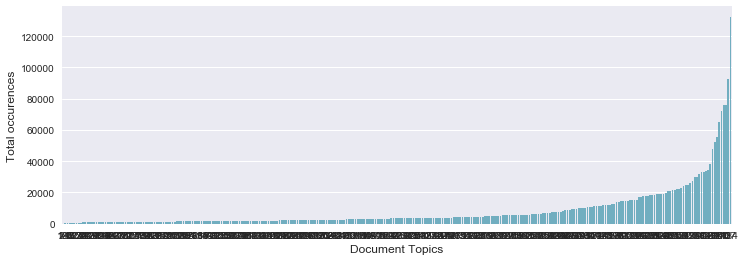

In [7]:
topic_ids = topics.groupby('topic_id')['document_id'].count().sort_values()

for i in [1, 5, 10, 20, 50, 100]:
    print('Number of topics that appear more than {}% times: {}'
          .format(i, (topic_ids > (float(i) * float(total_docs)/100)).sum()))

plt.figure(figsize=(12, 4))
sns.barplot(topic_ids.index, topic_ids.values, order=topic_ids.index, alpha=1, color=p[5])
plt.xlabel('Document Topics', fontsize=12)
plt.ylabel('Total occurences', fontsize=12)
plt.show()

Topics as a feature will add a large number of dummy variables but will be extremely sparse.
Hence considering only the top 5 topics as features.

In [36]:
topic_ids = topic_ids.tail(5).index
print(topic_ids)

Int64Index([140, 173, 16, 107, 184], dtype='int64', name=u'topic_id')


<b>Categories as features</b>

In [28]:
categories = pd.read_csv('./data/documents_categories.csv',  dtype={"document_id": int})
categories = confidence_max(categories)

('Columns:', ['document_id', 'category_id', 'confidence_level'])
('Number of unique categories:', 95)
('Total number of unique documents having a topic:', 2828649)
Number of categories that appear more than 1% times: 28
Number of categories that appear more than 5% times: 4
Number of categories that appear more than 10% times: 1
Number of categories that appear more than 20% times: 0
Number of categories that appear more than 50% times: 0
Number of categories that appear more than 100% times: 0


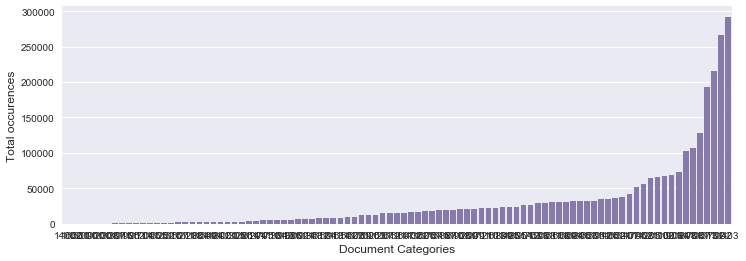

In [38]:
print('Columns:', categories.columns.tolist())
print('Number of unique categories:', len(categories.category_id.unique()))
total_docs = len(categories.document_id.unique())
print('Total number of unique documents having a topic:', total_docs)

cat_ids = categories.groupby('category_id')['confidence_level'].count().sort_values()

for i in [1, 5, 10, 20, 50, 100]:
    print('Number of categories that appear more than {}% times: {}'
          .format(i, (cat_ids > (float(i) * float(total_docs)/100)).sum()))

plt.figure(figsize=(12, 4))
sns.barplot(cat_ids.index, cat_ids.values, order=cat_ids.index, alpha=1, color=p[3])
plt.xlabel('Document Categories', fontsize=12)
plt.ylabel('Total occurences', fontsize=12)
plt.show()

Similar to Topics, Categories as a feature will add a large number of dummy variables but will be extremely sparse.
Hence considering only the top 5 categories as features.

In [39]:
cat_ids = cat_ids.tail(5).index
print(cat_ids)

Int64Index([1907, 1513, 1702, 1902, 1403], dtype='int64', name=u'category_id')


<b>Entities as features</b>

In [46]:
entities = pd.read_csv('./data/documents_entities.csv',  dtype={"document_id": int})
entities = confidence_max(entities)

In [48]:
print('Columns:', entities.columns.tolist())
print('Number of unique entities:', len(entities.entity_id.unique()))
total_docs = len(entities.document_id.unique())
print('Total number of unique documents having an entity:', total_docs)

entity_ids = entities.groupby('entity_id')['confidence_level'].count().sort_values()

## In terms of percentages
for i in [0.5, 1, 5, 10, 20, 50, 100]:
    print('Number of categories that appear more than {}% times: {}'
          .format(i, (entity_ids > (float(i) * float(total_docs)/100)).sum()))
## In terms of numbers
print("\n")
for i in [1, 5, 10, 100, 1000, 10000, 50000, 100000, 150000]:
    print('Number of entities that appear more than {} times: {}'
          .format(i, (entity_ids > i).sum()))

# Too huge to plot hence skipping cummulative bar plot
#plt.figure(figsize=(12, 4))
#sns.barplot(entity_ids.index, entity_ids.values, order=entity_ids.index, alpha=1, color=p[3])
#plt.xlabel('Document Entities', fontsize=12)
#plt.ylabel('Total occurences', fontsize=12)
#plt.show()
print ('exactly 1 time {}'.format(((entity_ids == 1).sum())))
print ('exactly 0 time {}'.format(((entity_ids == 0).sum())))

('Columns:', ['document_id', 'entity_id', 'confidence_level'])
('Number of unique entities:', 533554)
('Total number of unique documents having an entity:', 1791420)
Number of categories that appear more than 0.5% times: 6
Number of categories that appear more than 1% times: 3
Number of categories that appear more than 5% times: 1
Number of categories that appear more than 10% times: 0
Number of categories that appear more than 20% times: 0
Number of categories that appear more than 50% times: 0
Number of categories that appear more than 100% times: 0


Number of entities that appear more than 1 times: 127858
Number of entities that appear more than 5 times: 30029
Number of entities that appear more than 10 times: 15493
Number of entities that appear more than 100 times: 1285
Number of entities that appear more than 1000 times: 70
Number of entities that appear more than 10000 times: 5
Number of entities that appear more than 50000 times: 2
Number of entities that appear more than 1000

Again, similar to Topics and Categories, Entities as a feature will add a large number of dummy variables but will be extremely sparse. Hence considering only the top 5 categories as features.

In [50]:
entity_ids = entity_ids.tail(5).index
print(entity_ids)

Index([u'98bf11f29dd0160f58d870c0c7c6f07f',
       u'024d2d0130c4b1737554ad62ba94c6fa',
       u'4b7289d10fcf4499ab14113c7e1b1c57',
       u'e3e4b172a6e3fe3a428fb8d0f18cc611',
       u'bd16d44696774327ea88b82595212b99'],
      dtype='object', name=u'entity_id')


<i> To further reduce the number of features and to remove multicollinearity between the Topics, Entities and Cateogories as features, maybe its worth looking into if they are related i.e. does one Title imply that the ad will be of a particular Category. Similiarly, does the Ad being of a particular Entity imply that it will be of a particular Category. For this I am using Contigency table and Chi-square test</i>

Fix dtypes

In [ ]:
categories.category_id = categories.category_id.apply(str)

In [ ]:
topics.topic_id = topics.topic_id.apply(str)

#### Check collinearity between Topics and Categories

In [ ]:
# OuterjoinM
topics_cat = pd.merge(topics, categories, how='outer', left_on = 'document_id', right_on = 'document_id')
topics_cat.drop('document_id', axis=1, inplace=True)
ct = pd.crosstab(topics_cat.topic_id, topics_cat.category_id)
drop(topics_cat)
stats.chi2_contingency(ct)

#### Check collinearity between Entities and Categories

In [ ]:
entities_cat = pd.merge(entities, categories, how='outer', left_on = 'document_id', right_on = 'document_id')
entities_cat.drop('document_id', axis=1, inplace=True)
ct = pd.crosstab(entities_cat.entity_id, entities_cat.category_id)
stats.chi2_contingency(ct)
drop(entities_cat)

#### P-value is 0 for both Title-Category relationship and Entity-Category relationship suggesting that these features are correlated.

## 2. Documents meta as features

('Columns:', ['document_id', 'source_id', 'publisher_id', 'publish_time'])
('Number of unique publishers:', 1260)
('Total number of unique documents having a publisher:', 2999334)
Number of publisher that appear more than 0.01% times: 508
Number of publisher that appear more than 0.25% times: 79
Number of publisher that appear more than 0.5% times: 41
Number of publisher that appear more than 1% times: 15
Number of publisher that appear more than 5% times: 2
Number of publisher that appear more than 10% times: 0
Number of publisher that appear more than 20% times: 0
Number of publisher that appear more than 50% times: 0
Number of publisher that appear more than 100% times: 0


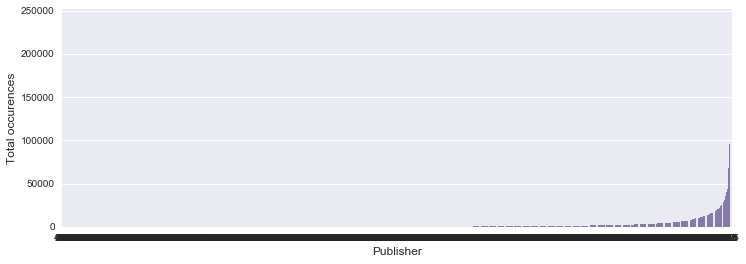

In [3]:
documents_meta = pd.read_csv('./data/documents_meta.csv',  dtype={"document_id": int, "source_id": object, "publisher_id": object, "publish_time": object})

print('Columns:', documents_meta.columns.tolist())
print('Number of unique publishers:', len(documents_meta.publisher_id.unique()))
total_docs = len(documents_meta.document_id.unique())
print('Total number of unique documents having a publisher:', total_docs)

publisher_ids = documents_meta.groupby('publisher_id')['document_id'].count().sort_values()

## In terms of percentages
for i in [0.01, 0.25, 0.5, 1, 5, 10, 20, 50, 100]:
    print('Number of publisher that appear more than {}% times: {}'
          .format(i, (publisher_ids > (float(i) * float(total_docs)/100)).sum()))

plt.figure(figsize=(12, 4))
sns.barplot(publisher_ids.index, publisher_ids.values, order=publisher_ids.index, alpha=1, color=p[3])
plt.xlabel('Publisher', fontsize=12)
plt.ylabel('Total occurences', fontsize=12)
plt.show()

In [5]:
publisher_ids = publisher_ids.tail(5).index
print(publisher_ids)

Index([u'255', u'435', u'440', u'450', u'925'], dtype='object', name=u'publisher_id')


Considering only top 5 publisher

## 3. Platform as feature

In [5]:
events = pd.read_csv('./data/events.csv')
events.head()

C:\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,display_id,uuid,document_id,timestamp,platform,geo_location
0,1,cb8c55702adb93,379743,61,3,US>SC>519
1,2,79a85fa78311b9,1794259,81,2,US>CA>807
2,3,822932ce3d8757,1179111,182,2,US>MI>505
3,4,85281d0a49f7ac,1777797,234,2,US>WV>564
4,5,8d0daef4bf5b56,252458,338,2,SG>00


In [12]:
print('\nUnique values of platform:', events.platform.unique())

('\nUnique values of platform:', array([3, 2, 1], dtype=int64))


Sanitizaing the platform data...

In [7]:
events.shape

(23120126, 6)

In [8]:
# Drop rows with unknown platform
events = events[events.platform != '\\N']

In [9]:
events.shape

(23120121, 6)

In [10]:
events.platform = events.platform.astype(int)

In [11]:
print('\nUnique values of platform:', events.platform.unique())

('\nUnique values of platform:', array([3, 2, 1], dtype=int64))


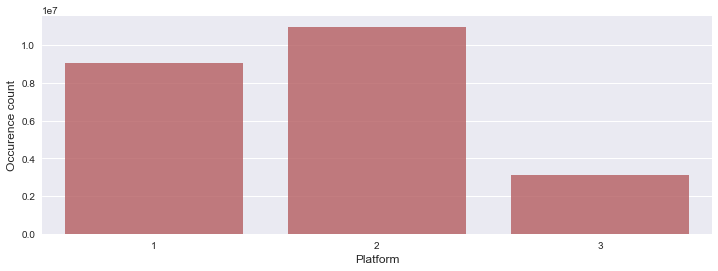

In [13]:
plat = events.platform.value_counts()

plt.figure(figsize=(12,4))
sns.barplot(plat.index, plat.values, alpha=0.8, color=p[2])
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Occurence count', fontsize=12)

Platform is relatively straight foward and can be considered as a feature

## 4. Regularized CTR

In [108]:
clicks_train = pd.read_csv('./data/clicks_train.csv',  dtype={"display_id": int, "ad_id": int, "clicked": int})

In [109]:
ads = clicks_train.groupby('ad_id', sort=False)

In [110]:
regularization = 10

In [111]:
ctrs = ads.clicked.sum()/ (ads.ad_id.count() + regularization)

In [112]:
ctrs = ctrs.to_frame('reg_ctr').reset_index()

In [116]:
ctrs.to_csv('reg_ctr.csv', index = True) #Write to CSV for later use